### Chapter 3 Exercise 9

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [2]:
# import data visualisation tools
import matplotlib.pyplot as plt
from matplotlib import pylab
# import plotly.plotly as py
# import plotly.graph_objs as go
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 10)

In [3]:
# import and view first 10 items of file
# url = "/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Auto.csv"
url = "../../Data/Auto.csv"
Auto = pd.read_csv(url)

In [4]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
list(Auto)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin',
 'name']

In [6]:
# verify missing values
Auto.isnull().sum().sum()

0

In [7]:
# Auto = Auto.drop(Auto.index[[32, 126, 330, 336, 354]])

In [8]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    int64  
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.0+ KB


In [9]:
# count 'origin'
Auto['origin'].value_counts()

1    248
3     79
2     70
Name: origin, dtype: int64

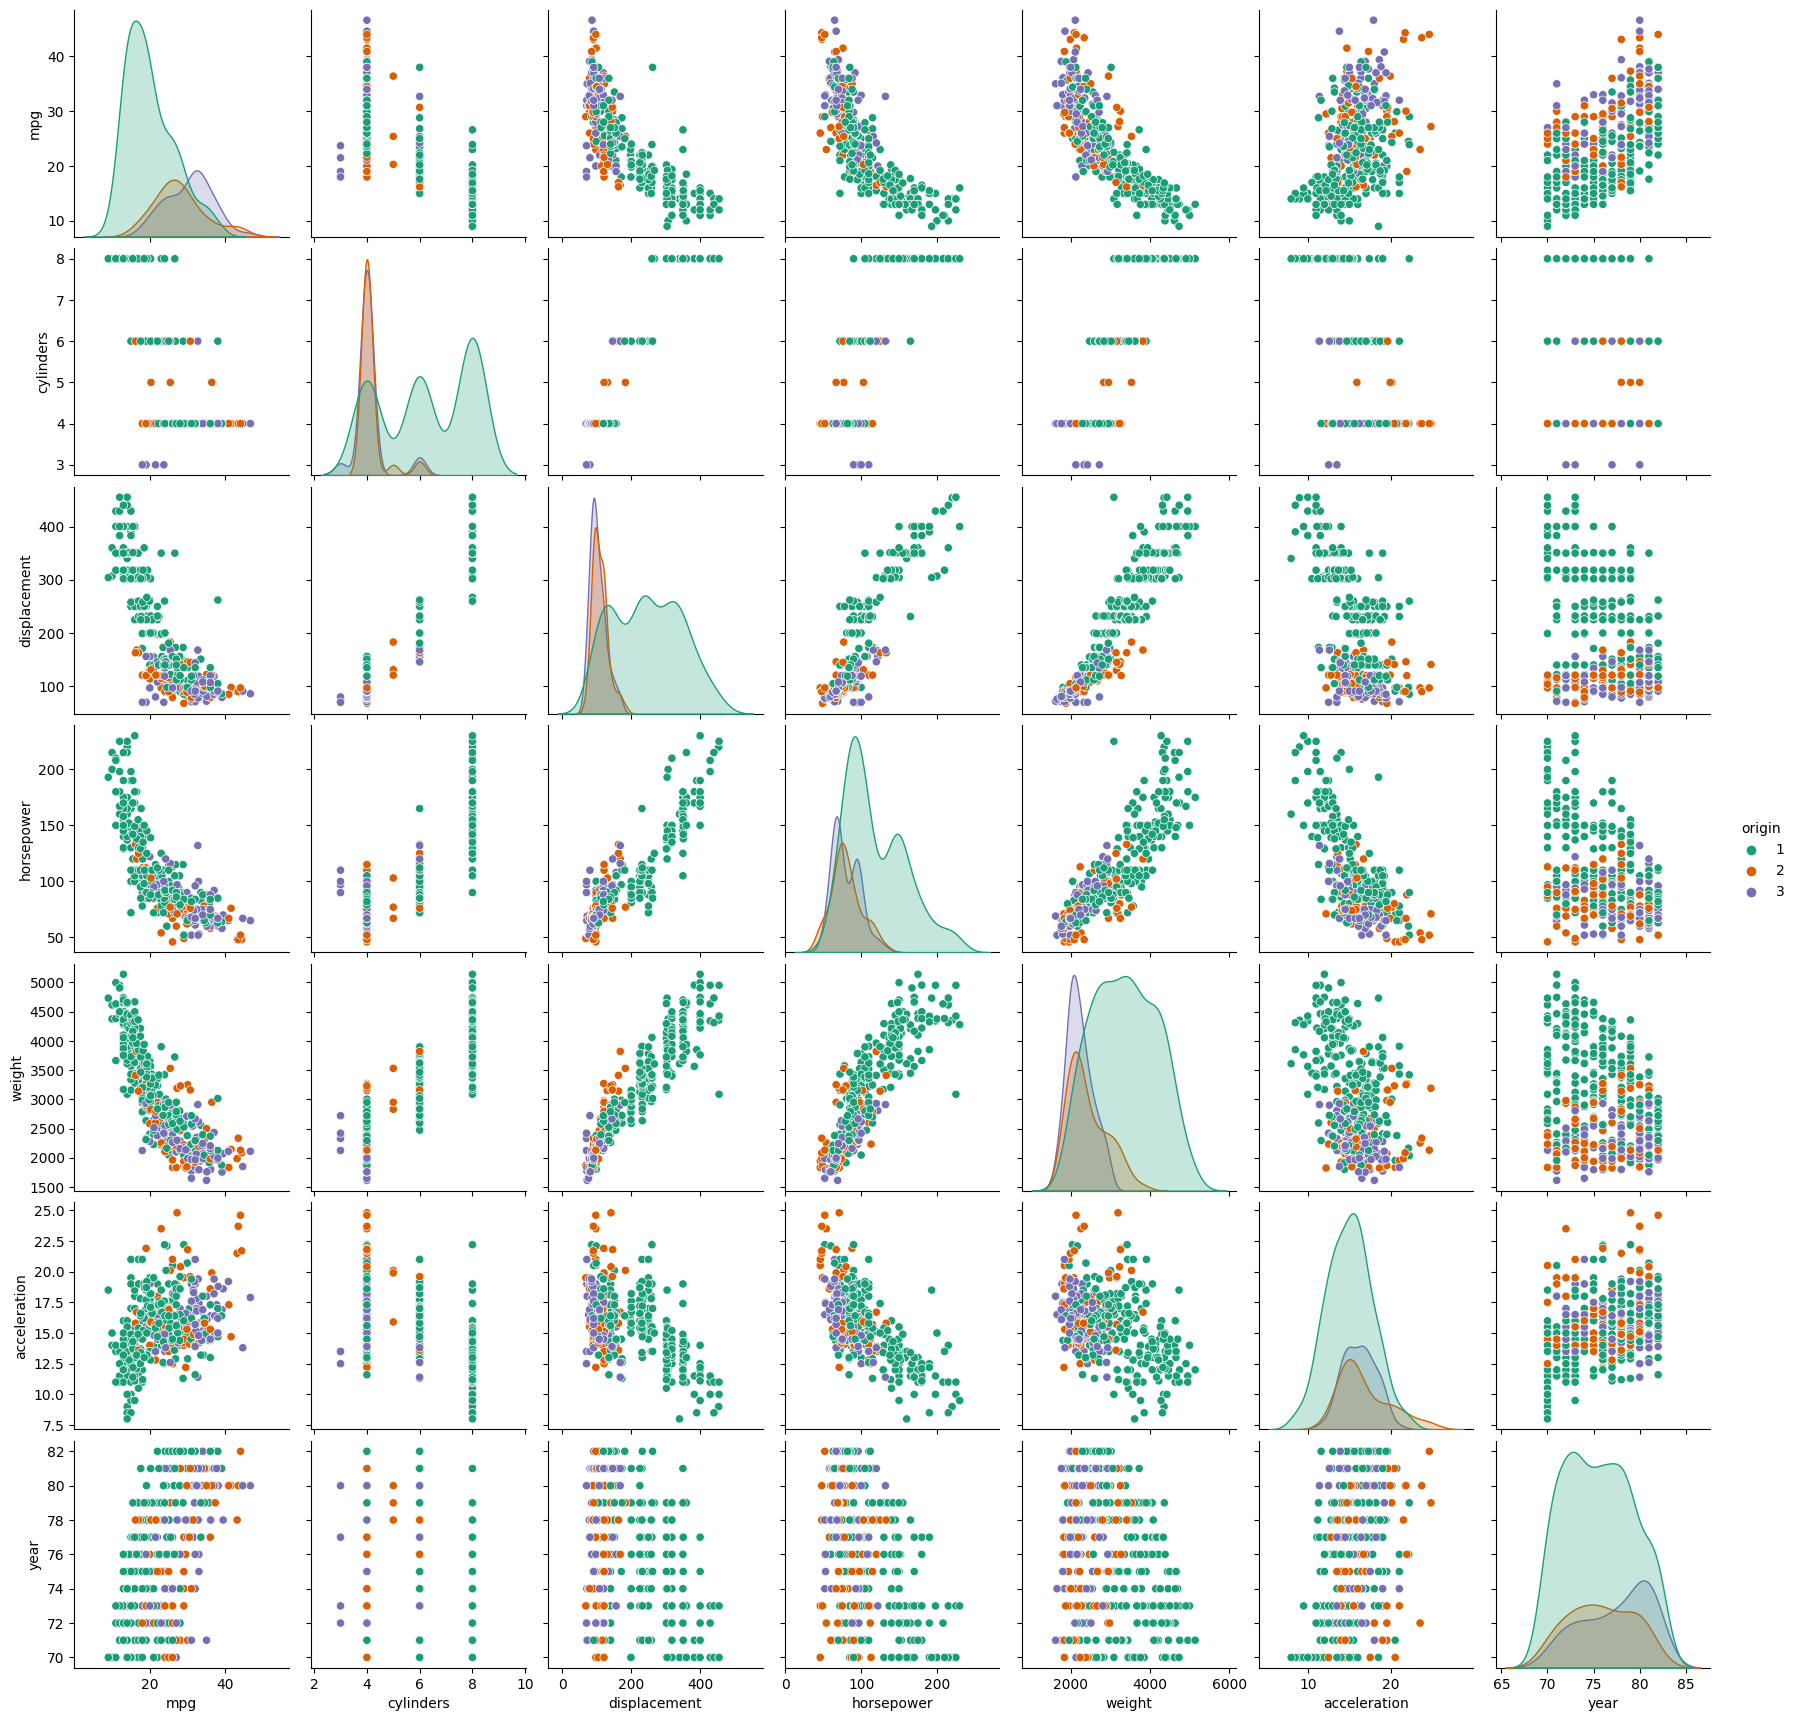

In [10]:
# 9.a. Scatterplot Matrix
sns.pairplot(Auto, hue = "origin", palette='Dark2')

In [11]:
# 9.b. Correlation Matrix
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.777416,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.843075,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.896921,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.777416,0.843075,0.896921,1.000000,0.863422,-0.686353,-0.418909,-0.453047
weight,-0.831739,0.897017,0.933104,0.863422,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.686353,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.418909,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.453047,-0.581265,0.210084,0.184314,1.000000


<Axes: >

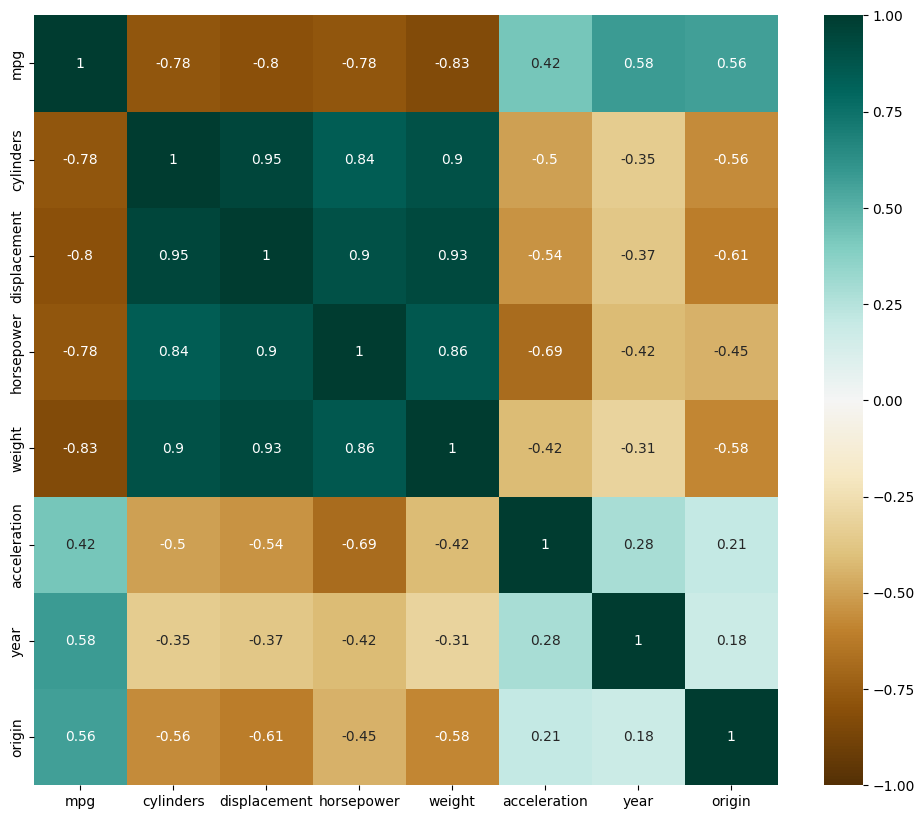

In [12]:
# correlation heatmap
sns.heatmap(Auto.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

Comments:
1.  All predictors have a medium to high correlation with the response variable (`mpg`).
2.  Some predictors have a high correlation (greater than 0.8). Example: displacement and horsepwoer, weight and displacement.

In [13]:
# 9.c. Run multivariate regression
Auto['hp'] = Auto['horsepower'].astype(float)

**For some annoying reason, Python is importing the horsepower column as string and not float. This will impact the 
regression results since we cannot regress string values. So, I am converting this column into float and storing the
values in to a new column called "hp". I will use the values in "hp" to regress "mpg".**

In [14]:
X = Auto[['cylinders', 'displacement', 'hp', 'weight',
       'acceleration', 'year', 'origin']]
Y = Auto['mpg']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

In [15]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.5
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          1.77e-141
Time:                        11:21:06   Log-Likelihood:                -1037.1
No. Observations:                 397   AIC:                             2090.
Df Residuals:                     389   BIC:                             2122.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.9332      4.639     -3.866      0.000     -27.053      -8.813
cylinders       -0.4575      0.322     -1.420      0.156      -1.091       0.176
displacement     0.0197      0.008      2.626      0.009       0.005       0.034
hp              -0.0143      0.014     -1.057      0.291      -0.041       0.012
weight          -0.0066      0.001    -10.318      0.000      -0.008      -0.005
acceleration     0.0972      0.097      1.001      0.317      -0.094       0.288
year             0.7575      0.051     14.913      0.000       0.658       0.857
origin           1.4217      0.276      5.149      0.000       0.879       1.965
==============================================================================
Omnibus:                       30.051   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.222
Skew:                           0.510   Prob(JB):                     3.38e-11
Kurtosis:                       4.369   Cond. No.                     8.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# 9.e. & 9.f. Run multivariate regression with interaction terms and transformations
X1 = Auto['hp']
X2 = Auto['weight']
X3 = Auto['acceleration']
X4 = Auto['year']
X5 = Auto['origin']
X6 = Auto['displacement']
X7 = Auto['cylinders']
Y = Auto['mpg']
reg = ols("Y~X1+X2+X3+X4+X5+X6+X7+X7*X6+X7*X2+X6*X2", data = Auto).fit()

**There is no pure statistical method to assess interaction terms. ISLR  provides some clever examples to deduce this. But ultimately, it will depend
on chopping and changing between different independent variables depending on your research goals. This question on Stats Stack Exchange provides an
excellent answer - http://bit.ly/2ApTvQ4
<br><br>
For the sake of brevity, I have included interactions between terms with higest covariance amongst them.**

In [17]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     237.3
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          4.77e-158
Time:                        11:21:14   Log-Likelihood:                -989.23
No. Observations:                 397   AIC:                             2000.
Df Residuals:                     386   BIC:                             2044.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.2188      6.070     -1.189      0.235     -19.154       4.716
X1            -0.0340      0.013     -2.638      0.009      -0.059      -0.009
X2            -0.0095      0.002     -4.080      0.000      -0.014      -0.005
X3             0.0706      0.087      0.810      0.418      -0.101       0.242
X4             0.7888      0.045     17.354      0.000       0.699       0.878
X5             0.5156      0.268      1.926      0.055      -0.011       1.042
X6            -0.0861      0.031     -2.756      0.006      -0.148      -0.025
X7             0.6475      1.530      0.423      0.672      -2.360       3.656
X7:X6          0.0017      0.003      0.553      0.581      -0.004       0.008
X7:X2         -0.0002      0.001     -0.483      0.630      -0.001       0.001
X6:X2       2.431e-05   6.14e-06      3.959      0.000    1.22e-05    3.64e-05
==============================================================================
Omnibus:                       44.204   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.443
Skew:                           0.608   Prob(JB):                     5.12e-21
Kurtosis:                       5.042   Cond. No.                     3.48e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
reg = ols("Y~X1+X2+X3+X4+X5+X6+X7+I(np.log(X1))+I(X4^2)", data = Auto).fit()

**I randomly chose two transformations for two variables:**
<br>
**1. Log-transformation for X1: OLS result suggests that for a unit change in log(X1), the miles per gallon reduces by ~27.2 units**
<br>
**2. Square of X4: OLS result suggests that for a unit increase in X4^2, the miles per gallon reduces by 0.12 units. However, the high p-value of this statistic suggests that the null hypothesis cannot be rejected. Therefore, essentially there is no difference between this particular value and 0, and therefore this statistic can be discarded.**

In [19]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     261.0
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          2.30e-158
Time:                        11:21:21   Log-Likelihood:                -991.38
No. Observations:                 397   AIC:                             2003.
Df Residuals:                     387   BIC:                             2043.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        83.5494     11.002      7.594      0.000      61.919     105.180
X1                0.1795      0.023      7.853      0.000       0.135       0.224
X2               -0.0036      0.001     -5.631      0.000      -0.005      -0.002
X3               -0.2770      0.094     -2.933      0.004      -0.463      -0.091
X4                0.8695      0.091      9.514      0.000       0.690       1.049
X5                0.9209      0.254      3.630      0.000       0.422       1.420
X6               -0.0052      0.007     -0.727      0.468      -0.019       0.009
X7                0.0056      0.292      0.019      0.985      -0.568       0.579
I(np.log(X1))   -26.3759      2.640     -9.990      0.000     -31.567     -21.185
I(X4 ^ 2)        -0.1212      0.076     -1.589      0.113      -0.271       0.029
==============================================================================
Omnibus:                       23.396   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.168
Skew:                           0.377   Prob(JB):                     1.15e-09
Kurtosis:                       4.386   Cond. No.                     2.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""